**Bigram and Trigram**

1. Split the text to bigram and trigram. Add these grams to "Chinese_review.csv"

2. Plot the frequency for some phrase relate to food

Ref: https://github.com/minimaxir/yelp-review-analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import FreqDist

In [2]:
import ast

In [3]:
df_review = pd.read_csv("Chinese_review.csv")
reviews_token = df_review["text_token"].tolist() 
reviews_token = [ast.literal_eval(review) for review in reviews_token]  ## conver the string to a list

In [4]:
reviews_token_flatten = [word for sublist in reviews_token for word in sublist]

In [5]:
from nltk import ngrams

In [6]:
def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

In [7]:
import re

In [8]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
for word in {"not","nor","no"}:
    stop_words.remove(word)
    
new_stopwords = {"'ve", '...',"'s","''",'``', "'m"}    

for word in new_stopwords:
    stop_words.add(word)

In [9]:
pattern = re.compile("[^\w']")

In [10]:
number = df_review.shape[0]
review_token_bigram = [" "] * number

for i in range(number):
    text_token = pattern.sub(' ', str.lower(df_review["text"][i])).split()
    bigrams = find_ngrams(text_token, 2)
    without_stopwords = list()
    
    for gram in bigrams:
        if (gram[0] in stop_words) or (gram[1] in stop_words):
            continue
        else:
            without_stopwords.append(gram)
            
    review_token_bigram[i] = without_stopwords
    


In [11]:
reviews_token_bigram_flatten = [word for sublist in review_token_bigram for word in sublist]

In [12]:
Bi_freq = FreqDist(reviews_token_bigram_flatten)

In [13]:
Bi_f = zip(Bi_freq.keys(),Bi_freq.values())  # dictionary to list
Bi_sort_f = list(sorted(Bi_f,key=lambda s: s[1], reverse=True))  # sort by number of frequency

In [14]:
Bi_sort_f[0:5]

[(('dim', 'sum'), 32607),
 (('chinese', 'food'), 31839),
 (('fried', 'rice'), 29386),
 (('come', 'back'), 12485),
 (('pretty', 'good'), 12222)]

In [15]:
df_review["bigram"] = review_token_bigram

In [16]:
FreqDist(reviews_token_bigram_flatten).most_common(100)

[(('dim', 'sum'), 32607),
 (('chinese', 'food'), 31839),
 (('fried', 'rice'), 29386),
 (('come', 'back'), 12485),
 (('pretty', 'good'), 12222),
 (('chinese', 'restaurant'), 11749),
 (('first', 'time'), 11576),
 (('really', 'good'), 11552),
 (('go', 'back'), 10402),
 (('orange', 'chicken'), 9348),
 (('noodle', 'soup'), 9117),
 (('customer', 'service'), 8276),
 (('next', 'time'), 7506),
 (("i'm", 'not'), 7423),
 (('egg', 'rolls'), 7365),
 (('good', 'food'), 7157),
 (('chow', 'mein'), 6602),
 (('pad', 'thai'), 6442),
 (('sour', 'soup'), 6419),
 (('hot', 'pot'), 6316),
 (('great', 'food'), 6207),
 (('highly', 'recommend'), 6172),
 (('not', 'sure'), 6108),
 (('chinese', 'restaurants'), 6106),
 (('5', 'stars'), 5968),
 (('spring', 'rolls'), 5959),
 (("i've", 'ever'), 5918),
 (('coming', 'back'), 5860),
 (('every', 'time'), 5851),
 (('lo', 'mein'), 5703),
 (('best', 'chinese'), 5513),
 (('las', 'vegas'), 5264),
 (('even', 'though'), 5223),
 (('deep', 'fried'), 5194),
 (('bbq', 'pork'), 5018),

In [17]:
review_token_trigram = [" "] * number

for i in range(number):
    text_token = pattern.sub(' ', str.lower(df_review["text"][i])).split()
    trigrams = find_ngrams(text_token, 3)
    without_stopwords = list()
    
    for gram in trigrams:
        if (gram[0] in stop_words) or (gram[1] in stop_words):
            continue
        else:
            without_stopwords.append(gram)
            
    review_token_trigram[i] = without_stopwords
    


In [18]:
reviews_token_trigram_flatten = [word for sublist in review_token_trigram for word in sublist]

In [19]:
df_review["trigram"] = review_token_trigram

In [20]:
## Bigram Word frequency for each star, Trigram ord frequency for each star

Bi_freq_star = list()
Tri_freq_star = list()

for rating in [1.0,2.0,3.0,4.0,5.0]:
    df_review_rating = df_review.loc[df_review['stars'] == rating]
    
    ## Bigram
    Bi_review_rating = df_review_rating["bigram"].values.tolist() ## each element is a string 
    ##Bi_review_rating = [ast.literal_eval(review) for review in Bi_review_rating]  ## conver the string to a list
   
    Bi_reviews_rating_flatten = [word for sublist in Bi_review_rating for word in sublist]
    Bi_freq_rating = FreqDist(Bi_reviews_rating_flatten)

    Bi_freq_star.append(Bi_freq_rating)
    
    ## Trigram
    Tri_review_rating = df_review_rating["trigram"].values.tolist() ## each element is a string 
    ##Tri_review_rating = [ast.literal_eval(review) for review in Tri_review_rating]  ## conver the string to a list
   
    Tri_reviews_rating_flatten = [word for sublist in Tri_review_rating for word in sublist]
    Tri_freq_rating = FreqDist(Tri_reviews_rating_flatten)

    Tri_freq_star.append(Tri_freq_rating)

In [21]:
Tri_freq = FreqDist(reviews_token_trigram_flatten)

In [22]:
Tri_f = zip(Tri_freq.keys(),Tri_freq.values())  # dictionary to list
Tri_sort_f = list(sorted(Tri_f,key=lambda s: s[1], reverse=True))  # sort by number of frequency

In [23]:
Tri_sort_f[0:5]

[(('fried', 'rice', 'and'), 4902),
 (("i've", 'ever', 'had'), 3874),
 (('fried', 'rice', 'was'), 3243),
 (('egg', 'drop', 'soup'), 3123),
 (('chinese', 'food', 'in'), 2997)]

In [24]:
FreqDist(reviews_token_trigram_flatten).most_common(100)

[(('fried', 'rice', 'and'), 4902),
 (("i've", 'ever', 'had'), 3874),
 (('fried', 'rice', 'was'), 3243),
 (('egg', 'drop', 'soup'), 3123),
 (('chinese', 'food', 'in'), 2997),
 (('beef', 'noodle', 'soup'), 2942),
 (('kung', 'pao', 'chicken'), 2916),
 (('best', 'chinese', 'food'), 2804),
 (('chicken', 'fried', 'rice'), 2686),
 (('every', 'time', 'i'), 2211),
 (("i'm", 'not', 'sure'), 2177),
 (("can't", 'wait', 'to'), 2108),
 (('not', 'sure', 'if'), 2090),
 (('chinese', 'food', 'i'), 2073),
 (('good', 'chinese', 'food'), 2069),
 (('authentic', 'chinese', 'food'), 2044),
 (('definitely', 'come', 'back'), 2006),
 (('food', 'came', 'out'), 1981),
 (('dim', 'sum', 'and'), 1973),
 (('chinese', 'restaurant', 'in'), 1966),
 (('chinese', 'food', 'and'), 1880),
 (('pork', 'fried', 'rice'), 1858),
 (('great', 'place', 'to'), 1832),
 (('general', "tso's", 'chicken'), 1803),
 (('orange', 'chicken', 'and'), 1756),
 (('first', 'time', 'i'), 1725),
 (('hong', 'kong', 'style'), 1673),
 (('come', 'back', '

In [25]:
bigram_length = [len(i) for i in review_token_bigram]

In [26]:
trigram_length = [len(i) for i in review_token_trigram]

In [27]:
df_review["bigram_length"] = bigram_length
df_review["trigram_length"] = trigram_length

In [28]:
df_review.to_csv("Chinese_review.csv")

In [29]:
## The number of bigram for each star
star_bigram_number = list()
for rating in [1.0,2.0,3.0,4.0,5.0]:
    df_review_rating = df_review.loc[df_review['stars'] == rating]       
    star_bigram_number.append(df_review_rating["bigram_length"].sum())

In [30]:
## The number of trigram for each star
star_trigram_number = list()
for rating in [1.0,2.0,3.0,4.0,5.0]:
    df_review_rating = df_review.loc[df_review['stars'] == rating]       
    star_trigram_number.append(df_review_rating["trigram_length"].sum())

In [31]:
def plot_hist_bigram(word, save = True):
    freq = list()
    for i in range(5):
        scale_freq = dict(Bi_freq_star[i])[word] / star_bigram_number[i]
        freq.append(scale_freq)
    plt.bar(range(5),freq, tick_label = ["1.0", "2.0", "3.0", "4.0", "5.0"])
    plt.xlabel("Stars")
    plt.ylabel("Freq")
    plt.title(word)
    if save:
        plt.savefig(str(word) + ".png", dpi=500)
    plt.show()

In [32]:
dict(Bi_freq_star[0])[('dim', 'sum')]

2574

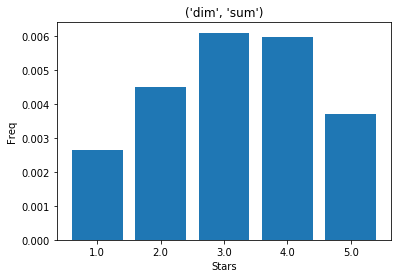

In [33]:
plot_hist_bigram(('dim', 'sum'))

In [34]:
def plot_Bi_hist_wordList(wordList, nRow, nCol, FileName, titlesize = 8, dpi = 500, save = True):
    count = 0
    for word in wordList:
        count += 1
        freq = list()
        for i in range(5):
            scale_freq = dict(Bi_freq_star[i])[word] / star_bigram_number[i]
            freq.append(scale_freq)
       ## plt.subplot(str(nRow) + str(nCol)+str(count))
        plt.subplot(nRow, nCol , count)
        plt.bar(range(5),freq, tick_label = ["1", "2", "3", "4", "5"])
        plt.tick_params(labelsize=6)
#         plt.xlabel("Stars")
#         plt.ylabel("Freq")
        plt.title(word, fontsize=titlesize)
    
    
    
    plt.subplots_adjust(wspace = 1, hspace = 1)
    
    if save:
        plt.savefig(FileName, dpi=dpi)
        
    plt.close()

In [35]:
def plot_Tri_hist_wordList(wordList, nRow, nCol, FileName, titlesize = 7, dpi = 500, save = True):
    count = 0
    for word in wordList:
        count += 1
        freq = list()
        for i in range(5):
            scale_freq = dict(Tri_freq_star[i])[word] / star_trigram_number[i]
            freq.append(scale_freq)
       ## plt.subplot(str(nRow) + str(nCol)+str(count))
        plt.subplot(nRow, nCol , count)
        plt.bar(range(5),freq, tick_label = ["1", "2", "3", "4", "5"])
#         plt.xlabel("Stars")
#         plt.ylabel("Freq")
        plt.tick_params(labelsize=6)
        plt.title(word, fontsize=titlesize)
        
    plt.subplots_adjust(wspace = 1, hspace = 1)
    
    if save:
        plt.savefig(FileName, dpi=dpi)
        
    plt.close()

In [36]:
Bi_top_100 = [""] * 100
for i in range(100):  
    Bi_top_100[i] = Bi_sort_f[i][0]
    

Tri_top_100 = [""] * 100
for i in range(100):  
    Tri_top_100[i] = Tri_sort_f[i][0]

In [37]:
plot_Bi_hist_wordList(Bi_top_100[0:10],2,5,"figure/Bi_Top10.png",dpi=1000)
plot_Bi_hist_wordList(Bi_top_100[10:20],2,5,"figure/Bi_Top20.png",dpi=1000)
plot_Bi_hist_wordList(Bi_top_100[20:30],2,5,"figure/Bi_Top30.png",dpi=1000)
plot_Bi_hist_wordList(Bi_top_100[30:40],2,5,"figure/Bi_Top40.png",dpi=1000)
plot_Bi_hist_wordList(Bi_top_100[40:50],2,5,"figure/Bi_Top50.png",dpi=1000)
plot_Bi_hist_wordList(Bi_top_100[50:60],2,5,"figure/Bi_Top60.png",dpi=1000)
plot_Bi_hist_wordList(Bi_top_100[60:70],2,5,"figure/Bi_Top70.png",dpi=1000)
plot_Bi_hist_wordList(Bi_top_100[70:80],2,5,"figure/Bi_Top80.png",dpi=1000)
plot_Bi_hist_wordList(Bi_top_100[80:90],2,5,"figure/Bi_Top90.png",dpi=1000)
plot_Bi_hist_wordList(Bi_top_100[90:100],2,5,"figure/Bi_Top100.png",dpi=1000)

In [38]:
plot_Bi_hist_wordList(Bi_top_100[0:10],2,5,"figure/Bi_Top10.png",dpi=1000)

In [39]:
plot_Tri_hist_wordList(Tri_top_100[0:10],2,5,"figure/Tri_Top10.png",dpi=1000)
plot_Tri_hist_wordList(Tri_top_100[10:20],2,5,"figure/Tri_Top20.png",dpi=1000)
plot_Tri_hist_wordList(Tri_top_100[20:30],2,5,"figure/Tri_Top30.png",dpi=1000)
plot_Tri_hist_wordList(Tri_top_100[30:40],2,5,"figure/Tri_Top40.png",dpi=1000)
plot_Tri_hist_wordList(Tri_top_100[40:50],2,5,"figure/Tri_Top50.png",dpi=1000)
plot_Tri_hist_wordList(Tri_top_100[50:60],2,5,"figure/Tri_Top60.png",dpi=1000)
plot_Tri_hist_wordList(Tri_top_100[60:70],2,5,"figure/Tri_Top70.png",dpi=1000)
plot_Tri_hist_wordList(Tri_top_100[70:80],2,5,"figure/Tri_Top80.png",dpi=1000)
plot_Tri_hist_wordList(Tri_top_100[80:90],2,5,"figure/Tri_Top90.png",dpi=1000)
plot_Tri_hist_wordList(Tri_top_100[90:100],2,5,"figure/Tri_Top100.png",dpi=1000)

In [40]:
Bi_Sig_Wordlist = [('orange', 'chicken'),('noodle', 'soup'), ('sour', 'soup'), 
                   ('hot','pot'), ('kung','pao'), ('mongolian', 'beef'),('soy', 'sauce') ,('beef', 'noodle'),('pork', 'belly')]

In [41]:
Tri_Sig_Wordlist = [('egg','drop','soup'),('beef','noodle','soup'),('kung', 'pao', 'chicken'), ('chicken','fried','rice'),('hand','pulled','noodles'),('egg','foo','young'),
                    ('hot','sour','soup'),('dan','dan','noodles'), ('beef','chow','fun')]

In [42]:
plot_Bi_hist_wordList(Bi_Sig_Wordlist,3,3,"figure/Bi_Significant.png",dpi=1000)

In [43]:
plot_Tri_hist_wordList(Tri_Sig_Wordlist,3,3,"figure/Tri_Significant.png",dpi=1000)